In [4]:
import numpy as np

initialC = 0.0
finalC = 2.4e-2
setpC = 2.4e-3

currents = np.arange(initialC, finalC, setpC)

In [5]:
currents

array([0.    , 0.0024, 0.0048, 0.0072, 0.0096, 0.012 , 0.0144, 0.0168,
       0.0192, 0.0216, 0.024 ])

In [8]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Set the folder containing the CSV files (current folder in this example)
csv_folder = 'useful_data_HT'

# Create the output folder for plots if it doesn't exist
plot_folder = 'plots'
if not os.path.exists(plot_folder):
    os.makedirs(plot_folder)

# Loop over all files in the csv_folder
for filename in os.listdir(csv_folder):
    if filename.endswith('.csv'):
        csv_path = os.path.join(csv_folder, filename)
        # Read the CSV file into a DataFrame
        df = pd.read_csv(csv_path)
        
        # Check if the required columns are present
        required_columns = ['Time', 'Height', 'Temp1 (Ambient)', 'Temp2 (Water)']
        if not all(col in df.columns for col in required_columns):
            print(f"Skipping {filename}: required columns not found.")
            continue
        
        # Create a plot: Temperature (x-axis) vs Height (y-axis)
        plt.figure(figsize=(8, 6))
        plt.plot(df['Height'], df['Temp1 (Ambient)'], label='Temp1')
        plt.plot(df['Height'], df['Temp2 (Water)'], label='Temp2')
        
        plt.xlabel('Height (mm)')
        plt.ylabel('Temperature °C')
        plt.title(f'Temperature vs Height - {filename}')
        plt.legend()
        plt.grid(True)
        
        # Save the figure as a PNG file in the "plots" folder
        output_filename = os.path.splitext(filename)[0] + '.png'
        output_path = os.path.join(plot_folder, output_filename)
        plt.savefig(output_path)
        plt.close()

        print(f"Saved plot for {filename} as {output_path}")


Saved plot for temperature_measurements_2025_02_26_16_35_14.csv as plots\temperature_measurements_2025_02_26_16_35_14.png
Saved plot for temperature_measurements_2025_02_26_18_22_30.csv as plots\temperature_measurements_2025_02_26_18_22_30.png
Saved plot for temperature_measurements_2025_02_26_18_42_07.csv as plots\temperature_measurements_2025_02_26_18_42_07.png


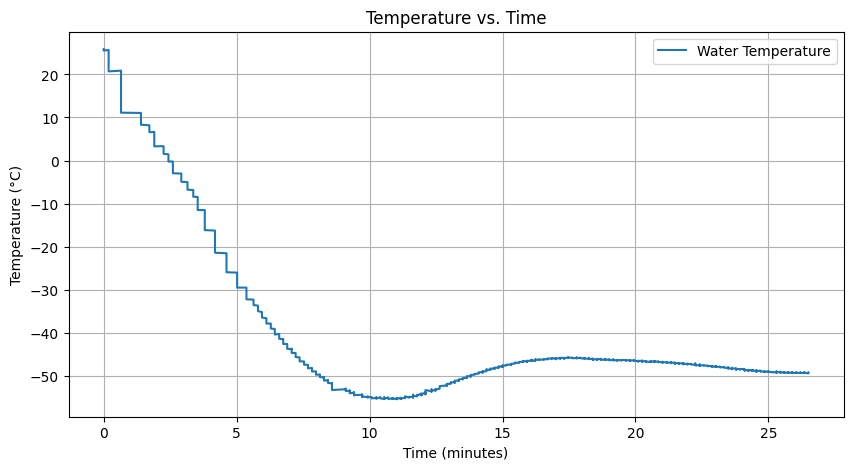

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Load the CSV file
file_path = "pid_control_library_data_2025_03_12_14_02_05.csv"  # Update with your actual file path
df = pd.read_csv(file_path, parse_dates=["Time"])

# Convert time to minutes relative to the first timestamp
df["Minutes"] = (df["Time"] - df["Time"].iloc[0]).dt.total_seconds() / 60

# Plot the data
plt.figure(figsize=(10, 5))
plt.plot(df["Minutes"], df["Measured Temp (Water)"], linestyle='-', label='Water Temperature')
plt.xlabel("Time (minutes)")
plt.ylabel("Temperature (°C)")
plt.title("Temperature vs. Time")
plt.legend()
plt.grid()
plt.show()